In [1]:
!pip install python-dotenv
!pip install pyodbc 

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

In [4]:
 #Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get('DATABASE')
server = environment_variables.get('SERVER')
username = environment_variables.get('USERNAME')
password = environment_variables.get('PASSWORD')
tablename = environment_variables.get('TABLENAME')

connection_string = f"DRIVER={{SQL Server}}; SERVER={server}; DATABASE={database}; UID={username}; PWD={password}"

In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [6]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)


In [7]:
data.to_csv('first_data.csv')

In [8]:

sechurn_data = pd.read_excel("C:/Users/HP/OneDrive - Azubi Africa/Desktop/Azubi-LP2/LP2/Telco-churn-second-2000.xlsx")

In [9]:
lachurn_data = pd.read_csv("C:/Users/HP/OneDrive - Azubi Africa/Desktop/Azubi-LP2/LP2/LP2_Telco-churn-last-2000.csv")

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [11]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [14]:
data.shape

(3000, 21)

In [15]:
data["Churn"].unique()

array([False, True, None], dtype=object)

In [16]:
lachurn_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
5,2359-QWQUL,Female,0,Yes,No,39,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),104.70,4134.85,Yes
6,9103-TCIHJ,Female,0,No,No,15,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.8,Yes
7,7407-SUJIZ,Male,0,No,No,25,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.5,No
8,9150-KPBJQ,Female,0,No,No,6,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,116.85,No
9,0052-DCKON,Male,0,Yes,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),115.80,7942.15,No


In [17]:
data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

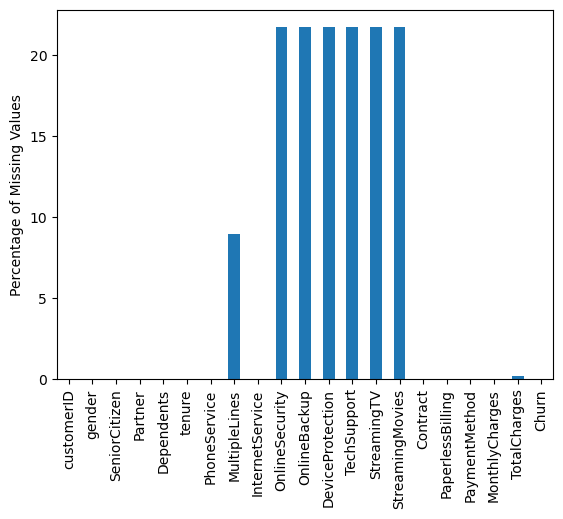

In [18]:
import matplotlib.pyplot as plt

missing_values_percentage = data.isnull().mean() * 100
missing_values_percentage.plot(kind='bar')
plt.ylabel('Percentage of Missing Values')
plt.show()


#### let Created a contigency Table showing the count of missing values in each combination of the three columns, 'DeviceProtection', 'StreamingTV', and 'OnlineSecurity'.

index: This is the column we want to use as the row index in the contingency table. In this case, we use the 'DeviceProtection' column and check if its values are missing (True) or not (False).

columns: This parameter is a list of columns that we want to use as the column index in the contingency table. Here, we use two columns, 'StreamingTV' and 'OnlineSecurity', and check if their values are missing (True) or not (False) separately.

rownames and colnames: These parameters allow us to provide names for the rows and columns in the resulting contingency table.

In [19]:
cross_tab = pd.crosstab(
    index=data['DeviceProtection'].isnull(),
    columns=[data['StreamingTV'].isnull(), data['OnlineSecurity'].isnull()],
    rownames=['DeviceProtection Missing'],
    colnames=['StreamingTV Missing', 'OnlineSecurity Missing']
)

print(cross_tab)

StreamingTV Missing      False True 
OnlineSecurity Missing   False True 
DeviceProtection Missing            
False                     2349     0
True                         0   651


In [20]:
missing_values_count = data.isnull().sum()
missing_values_percentage = (missing_values_count / len(data)) * 100

# Let Combine the count and percentage into a new DataFrame for better comparison
missing_df = pd.DataFrame({'Missing Count': missing_values_count, 'Missing Percentage': missing_values_percentage})

# Iterate over rows using iterrows()
for index, row in missing_df.iterrows():
    Missing_Count = row['Missing Count']
    Missing_Percentage = row['Missing Percentage']
    print(f"{index}: {Missing_Count} missing values, {Missing_Percentage:.2f}%")


customerID: 0.0 missing values, 0.00%
gender: 0.0 missing values, 0.00%
SeniorCitizen: 0.0 missing values, 0.00%
Partner: 0.0 missing values, 0.00%
Dependents: 0.0 missing values, 0.00%
tenure: 0.0 missing values, 0.00%
PhoneService: 0.0 missing values, 0.00%
MultipleLines: 269.0 missing values, 8.97%
InternetService: 0.0 missing values, 0.00%
OnlineSecurity: 651.0 missing values, 21.70%
OnlineBackup: 651.0 missing values, 21.70%
DeviceProtection: 651.0 missing values, 21.70%
TechSupport: 651.0 missing values, 21.70%
StreamingTV: 651.0 missing values, 21.70%
StreamingMovies: 651.0 missing values, 21.70%
Contract: 0.0 missing values, 0.00%
PaperlessBilling: 0.0 missing values, 0.00%
PaymentMethod: 0.0 missing values, 0.00%
MonthlyCharges: 0.0 missing values, 0.00%
TotalCharges: 5.0 missing values, 0.17%
Churn: 1.0 missing values, 0.03%


<Axes: >

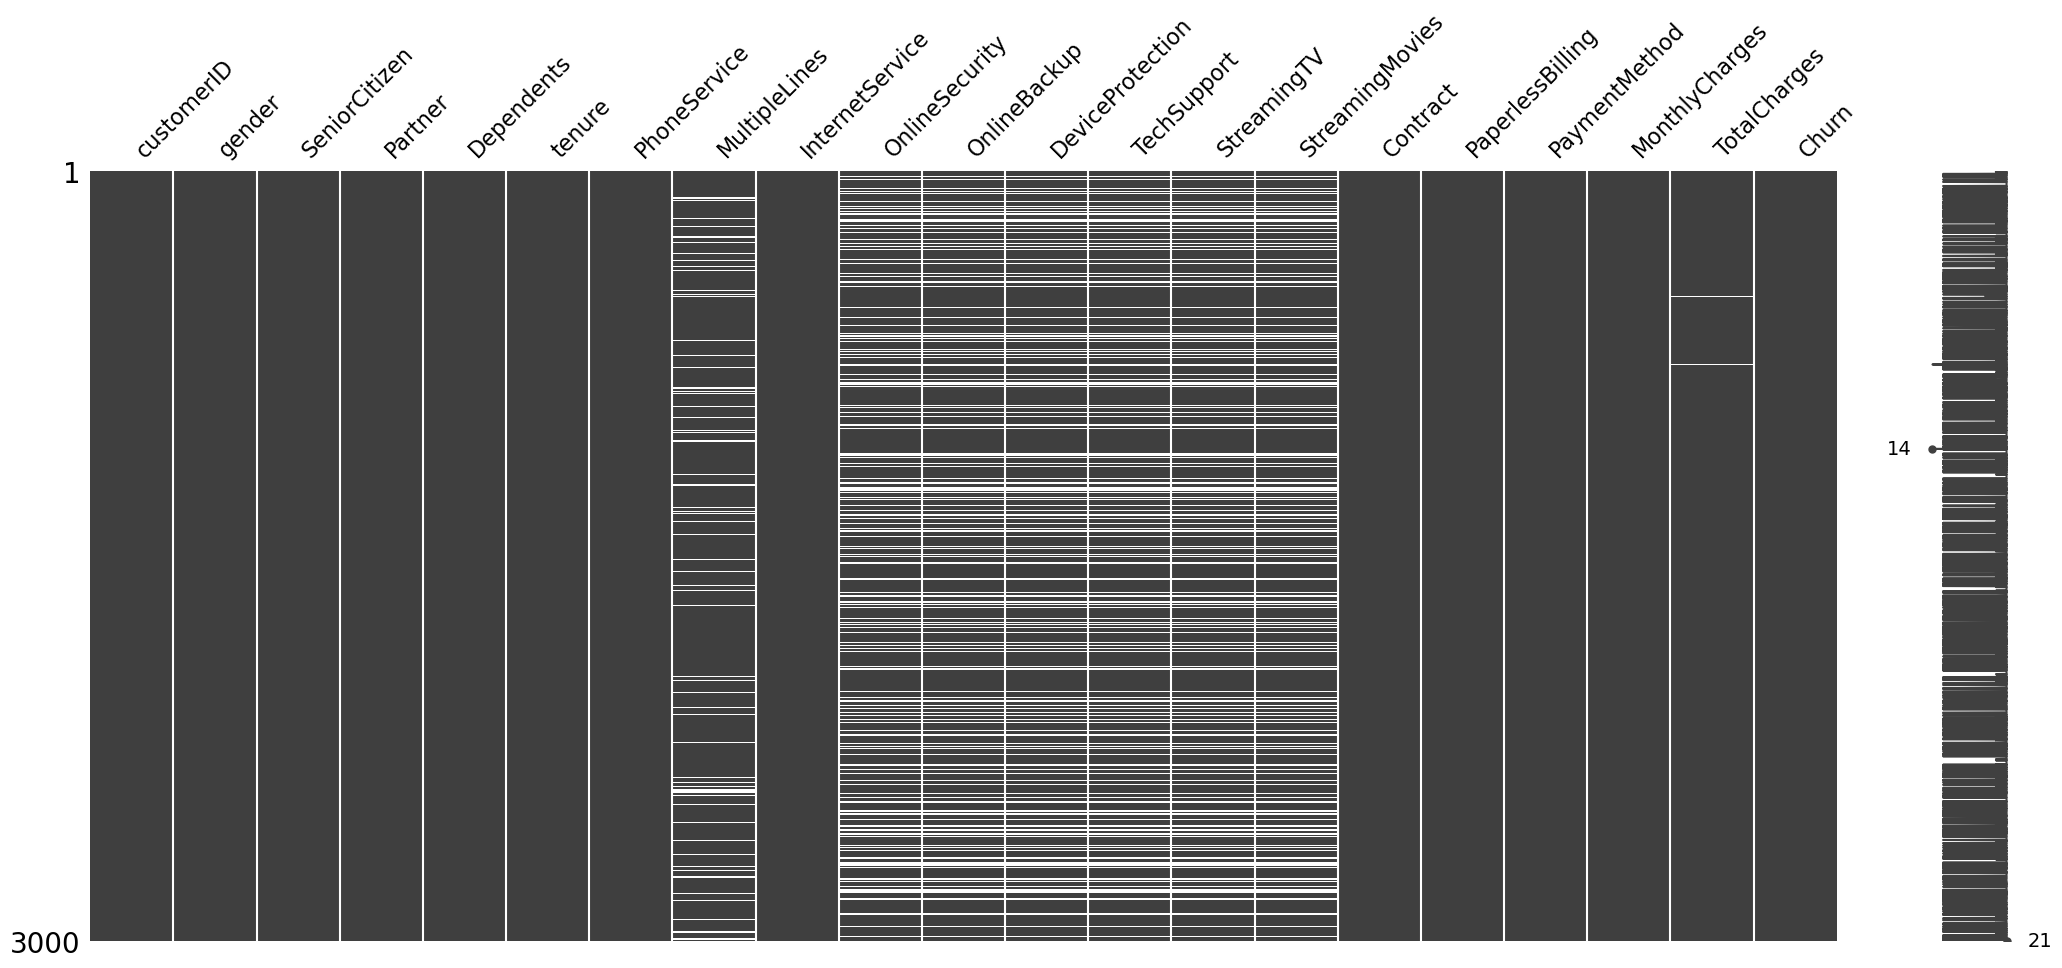

In [21]:
import missingno as msno
msno.matrix(data)

In [22]:
lachurn_data.shape

(2043, 21)

In [23]:
lachurn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [24]:
lachurn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [25]:
lachurn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [26]:
sechurn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [27]:
sechurn_data.shape

(2000, 20)

In [28]:
sechurn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


In [29]:
sechurn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


## BUSINESS UNDERSTANDING

#### *Title Of Project*
###The Prediction of customer Churn into a telecommunication company through Classification Models.
###Enhancing Telecommunication Data Understanding through Classification Models.

###Predicting customer Churn using a Classification Model.

#### Predicting Customer Churn for Enhanced Customer Retention using a Classification Model


#### *Project Description*

The project aims to assist a telecommunication company in comprehending their data better through classification models. The project involves analyzing the company's dataset, identifying business objectives, and conducting exploratory data analysis. Relevant features will be engineered, and suitable classification algorithms will be selected and trained. Model performance will be optimized through hyperparameter tuning. The model outputs will be interpreted to provide valuable insights to the client. Actionable recommendations will be presented, empowering the client to make informed decisions for improved business operations. Effective communication with the client and comprehensive documentation will be maintained throughout the project.


##### *Data mining goals and Research Questions*

Certainly! Here are four data mining goals and research questions that could be addressed in the project:

Data Mining Goal 1: Customer Churn Prediction.
Research Question: Can we build a classification model to predict customer churn based on historical usage patterns, demographics, and service-related data?

Data Mining Goal 2: Service Subscription Segmentation.
Research Question: How can we apply clustering techniques to segment customers into distinct groups based on their service subscription preferences and usage behavior?

Data Mining Goal 3: Network Anomaly Detection.
Research Question: Is it possible to use anomaly detection methods to identify unusual patterns in network traffic, helping the telecommunication company proactively address potential network issues or security threats?

Data Mining Goal 4: Customer Sentiment Analysis.
Research Question: Can natural language processing techniques be applied to analyze customer feedback and sentiment from call logs, emails, or social media, providing valuable insights into customer satisfaction and pain points?


### *Questions*
1. What is the overall churn rate in the dataset?

2. How does the churn rate vary between male and female customers (gender)?

3. Does the presence of additional services like OnlineSecurity, TechSupport, DeviceProtection, StreamingTV, or StreamingMovies influence customer churn rates?

4. How does the churn rate vary between male and female customers (gender)?

5.  What is the impact of internet service type (DSL or Fiber optic) on customer churn?

In [30]:
df= pd.concat([data, lachurn_data], ignore_index=True)
df.to_csv('concatenated.csv')

In [31]:
df_conc = pd.read_csv("C:/Users/HP/OneDrive - Azubi Africa/Desktop/Azubi-LP2/LP2/concatenated.csv")

Data Quality Assessment

In [32]:
# Calculate the percentage of missing values for each column
missing_percentages = df.isnull().sum() / df.shape[0] * 100

# Display the result for each column
print(f"% of missing values for each column:")
for col, percentage in missing_percentages.items():
    print(f"{col}: {percentage:.2f}%")

% of missing values for each column:
customerID: 0.00%
gender: 0.00%
SeniorCitizen: 0.00%
Partner: 0.00%
Dependents: 0.00%
tenure: 0.00%
PhoneService: 0.00%
MultipleLines: 5.33%
InternetService: 0.00%
OnlineSecurity: 12.91%
OnlineBackup: 12.91%
DeviceProtection: 12.91%
TechSupport: 12.91%
StreamingTV: 12.91%
StreamingMovies: 12.91%
Contract: 0.00%
PaperlessBilling: 0.00%
PaymentMethod: 0.00%
MonthlyCharges: 0.00%
TotalCharges: 0.10%
Churn: 0.02%


<Axes: >

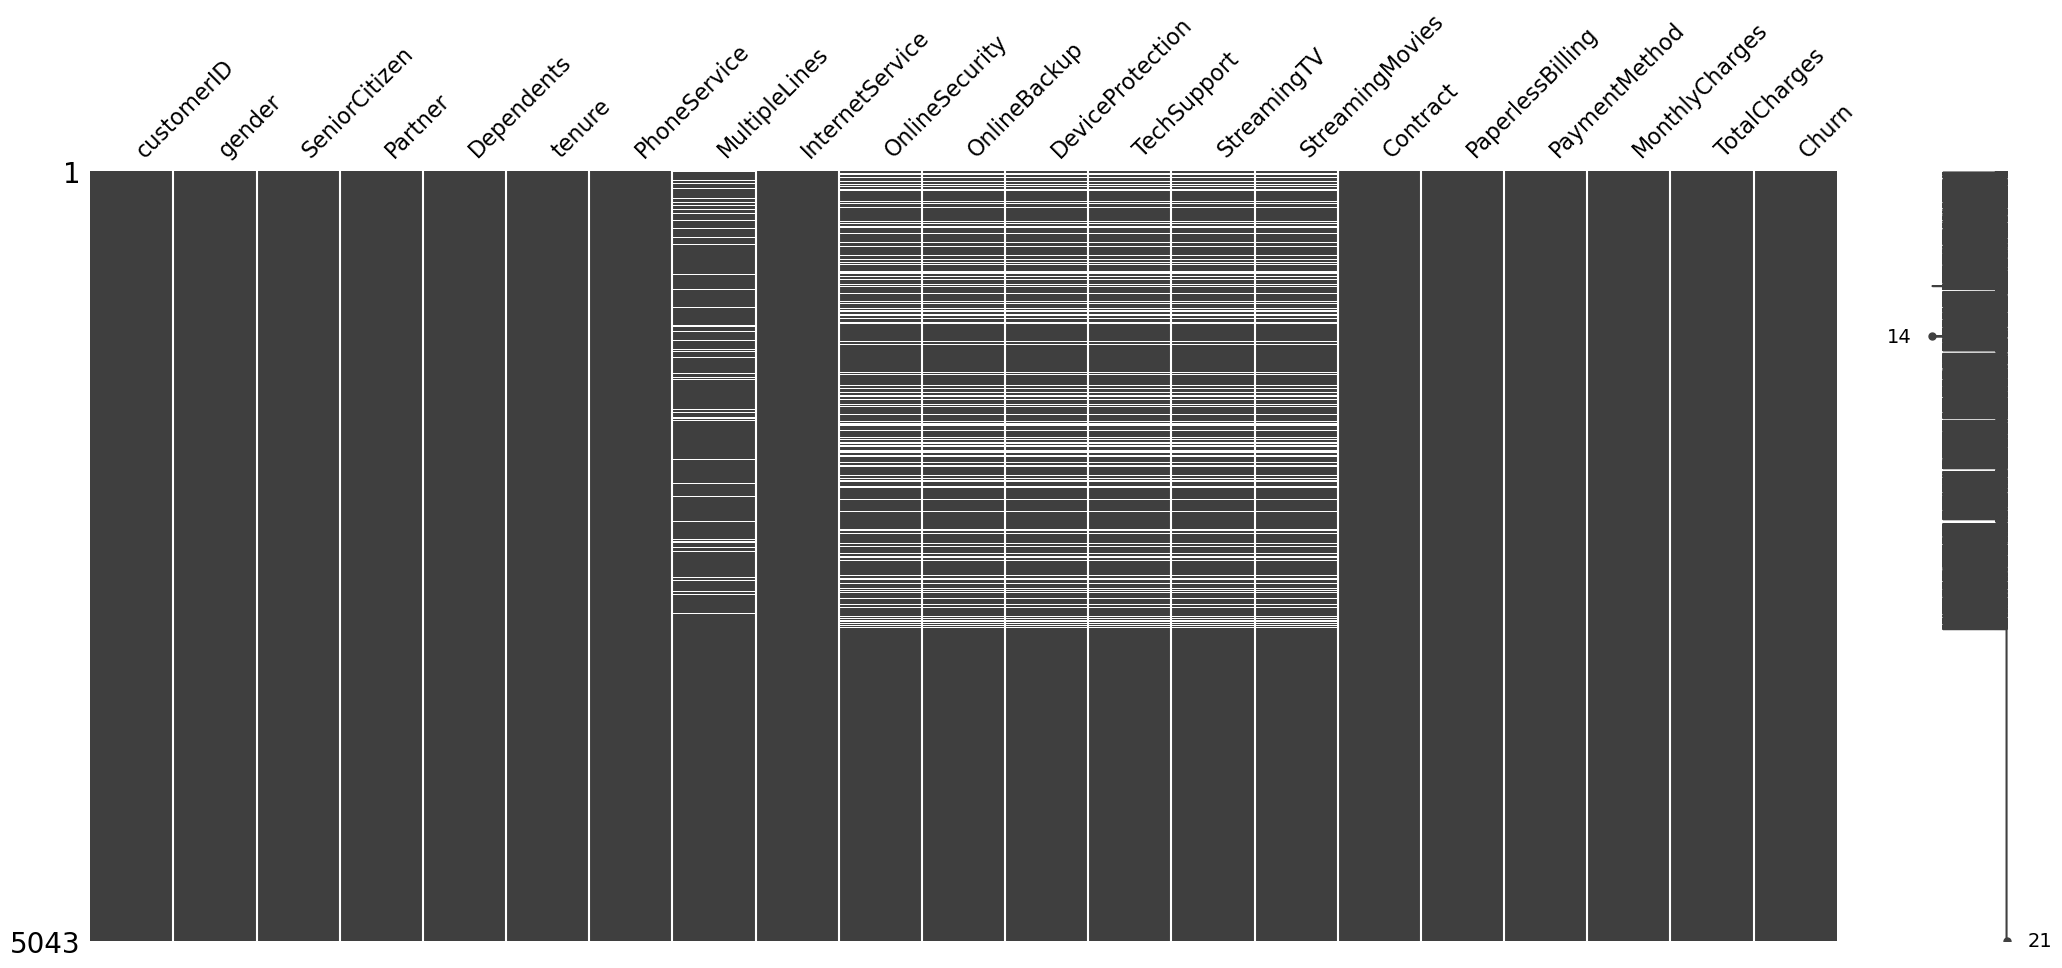

In [33]:
# Let's Visualize the Missing Values in our Data set by using the Missing Values Matrix
msno.matrix(df)

In [34]:
null_cols = list(df.columns[df.isnull().any()]) #obtain columns with missing values
print(null_cols)

['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']


In [35]:
for col in null_cols:
    print(f"% of Missings Values {col}: {(df[col].isnull().sum()/ df.shape[0]) * 100:.2f}%")

% of Missings Values MultipleLines: 5.33%
% of Missings Values OnlineSecurity: 12.91%
% of Missings Values OnlineBackup: 12.91%
% of Missings Values DeviceProtection: 12.91%
% of Missings Values TechSupport: 12.91%
% of Missings Values StreamingTV: 12.91%
% of Missings Values StreamingMovies: 12.91%
% of Missings Values TotalCharges: 0.10%
% of Missings Values Churn: 0.02%


In [36]:
df.duplicated().sum()

0

In [37]:
#exploring categorical columns.
df.describe(include='object') 

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5043,5043,5043,5043,5043,5043,4774,5043,4392,4392,4392,4392,4392,4392,5043,5043,5043,5038.000000,5042
unique,5043,2,2,4,4,4,5,3,5,5,5,5,5,5,3,4,4,4884.000000,4
top,7590-VHVEG,Male,False,False,False,True,False,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,20.200001,False
freq,1,2559,4224,1538,2070,2731,1437,2248,1478,1320,1296,1476,1190,1199,2744,1776,1700,5.000000,2219


In [38]:
df["Churn"]

0       False
1       False
2        True
3       False
4        True
        ...  
5038       No
5039       No
5040       No
5041      Yes
5042       No
Name: Churn, Length: 5043, dtype: object

In [39]:
df.iloc[2301]["Churn"]

False

In [40]:
df.iloc[1500]["Churn"]

False

<Axes: >

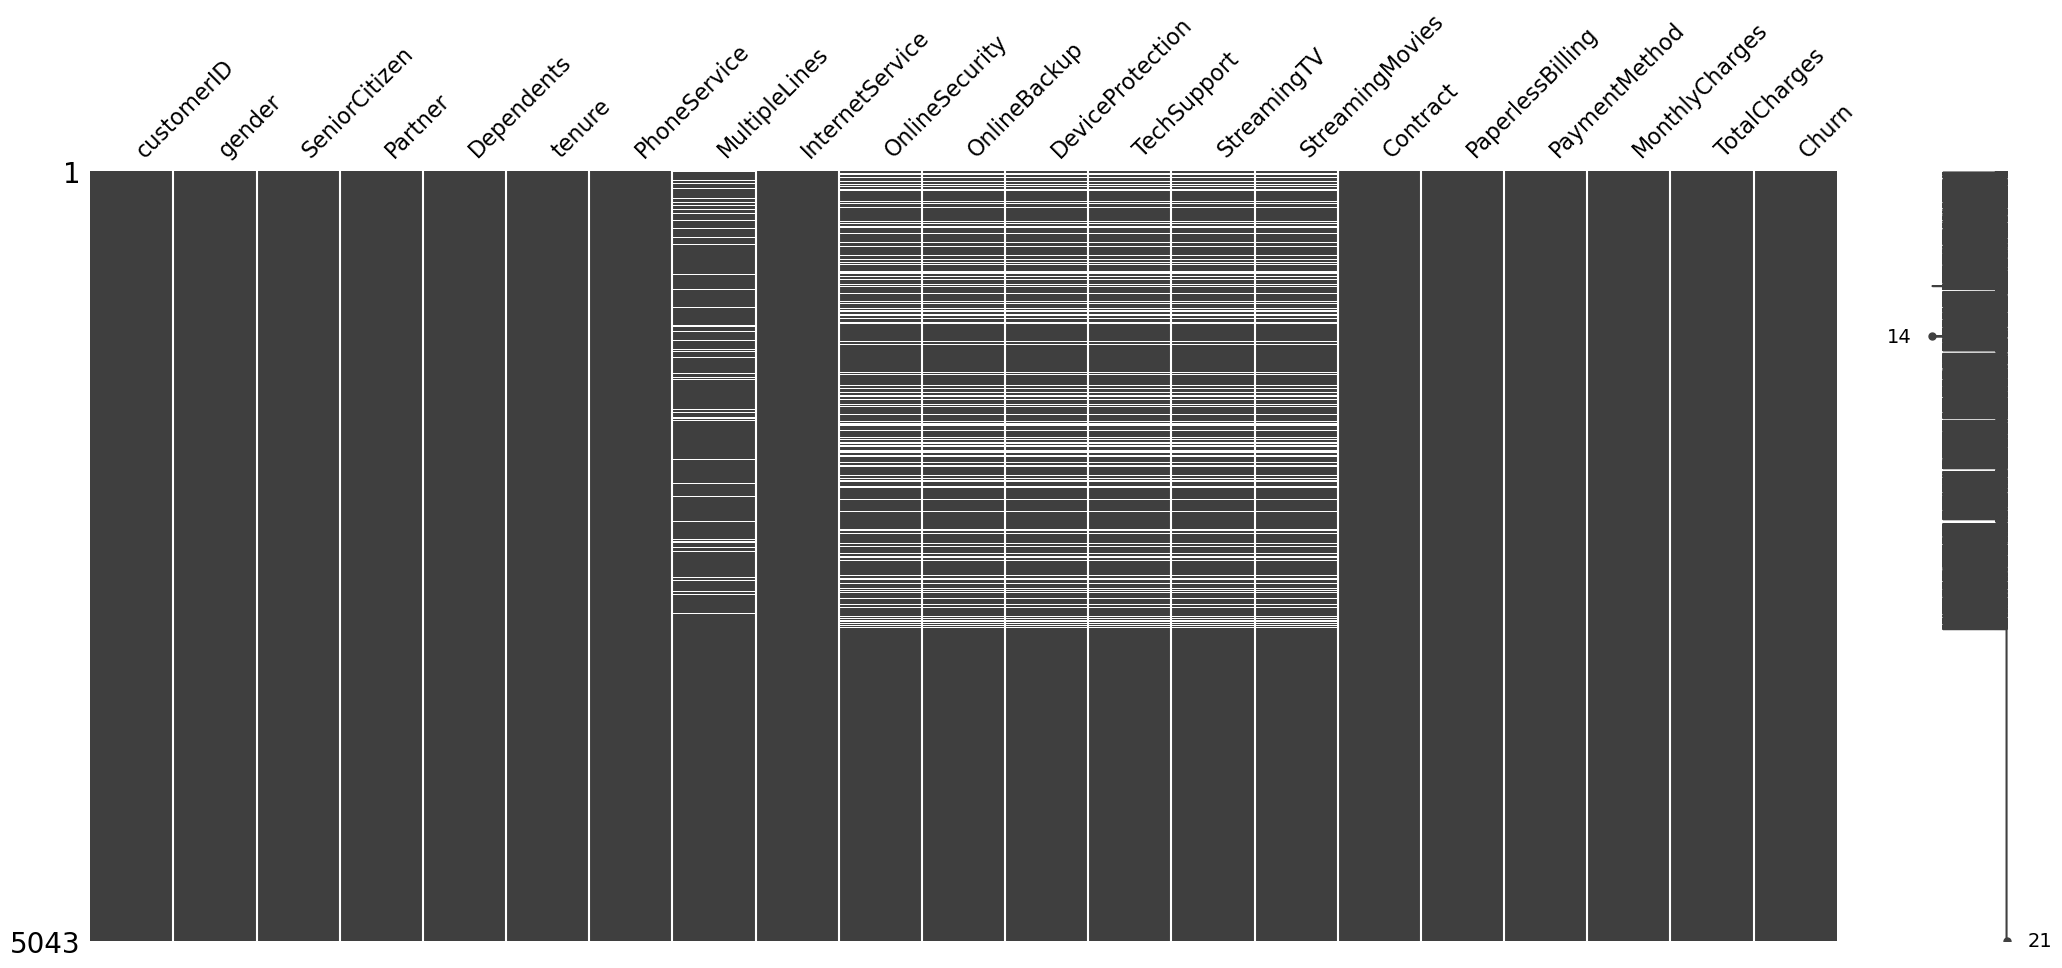

In [41]:
msno.matrix(df)

In [42]:
df["Churn"].isnull().sum()

1

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [44]:
df.shape

(5043, 21)

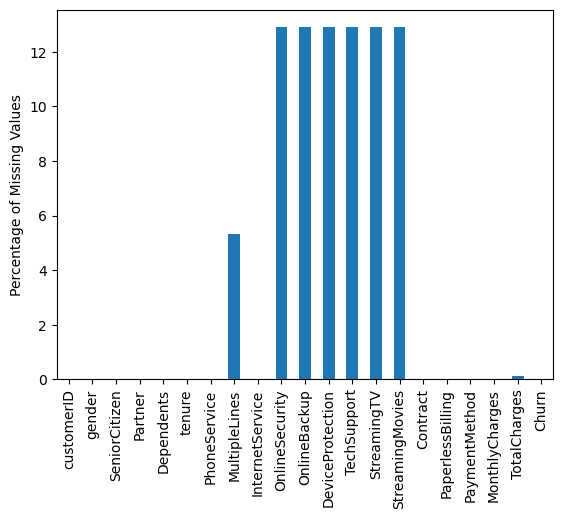

In [45]:
import matplotlib.pyplot as plt

missing_values_percentage = df.isnull().mean() * 100
missing_values_percentage.plot(kind='bar')
plt.ylabel('Percentage of Missing Values')
plt.show()


In [46]:
df["Churn"].unique()

array([False, True, None, 'No', 'Yes'], dtype=object)

In [47]:
selected_columns = ['customerID', 'gender', 'tenure', 'PhoneService', 'Churn']
preview_data = df.loc[:50, selected_columns]

# Print the preview
print(preview_data)

    customerID  gender  tenure PhoneService  Churn
0   7590-VHVEG  Female       1        False  False
1   5575-GNVDE    Male      34         True  False
2   3668-QPYBK    Male       2         True   True
3   7795-CFOCW    Male      45        False  False
4   9237-HQITU  Female       2         True   True
5   9305-CDSKC  Female       8         True   True
6   1452-KIOVK    Male      22         True  False
7   6713-OKOMC  Female      10        False  False
8   7892-POOKP  Female      28         True   True
9   6388-TABGU    Male      62         True  False
10  9763-GRSKD    Male      13         True  False
11  7469-LKBCI    Male      16         True  False
12  8091-TTVAX    Male      58         True  False
13  0280-XJGEX    Male      49         True   True
14  5129-JLPIS    Male      25         True  False
15  3655-SNQYZ  Female      69         True  False
16  8191-XWSZG  Female      52         True  False
17  9959-WOFKT    Male      71         True  False
18  4190-MFLUW  Female      10 

In [48]:
preview_data = df.loc[4020:4045, selected_columns]
print(preview_data)


      customerID  gender  tenure PhoneService Churn
4020  0020-JDNXP  Female      34           No    No
4021  3752-CQSJI  Female      13          Yes    No
4022  5025-GOOKI  Female      20          Yes    No
4023  4698-KVLLG  Female      51          Yes    No
4024  5095-AESKG  Female       3          Yes   Yes
4025  2887-JPYLU  Female      41          Yes    No
4026  4770-QAZXN  Female      13          Yes    No
4027  4896-CPRPF    Male      35          Yes    No
4028  1871-MOWRM    Male      12          Yes   Yes
4029  9714-EDSUC    Male       4          Yes    No
4030  2027-OAQQC  Female      43           No   Yes
4031  0282-NVSJS  Female      12           No    No
4032  9090-SGQXL    Male      68          Yes   Yes
4033  6595-YGXIT    Male      25          Yes   Yes
4034  7353-YOWFP  Female       7          Yes    No
4035  9835-ZIITK    Male      66          Yes   Yes
4036  8008-ESFLK  Female      53          Yes    No
4037  7537-CBQUZ    Male      63          Yes    No
4038  1555-D

Answer For ANalytical Questions

In [49]:
print(df['Churn'].dtype)

object


In [50]:
print(df['Churn'].unique())

[False True None 'No' 'Yes']


In [51]:
# Fill NaN values in the 'Churn' column with 0 (assuming NaN means retained customers)
df['Churn'].fillna(0, inplace=True)

In [52]:
# Assuming 'Churn' contains binary values (0 and 1), replace them with True and False
df['Churn'].replace({True:1, False:0}, inplace=True)

In [53]:
print(df['Churn'].unique())

[0 1 'No' 'Yes']


In [54]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [55]:
df['Churn'] = pd.to_numeric(df['Churn'])

In [56]:
print(df.shape)

(5043, 21)


In [57]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [58]:
#let us view row 100
print(df.iloc[100]['TotalCharges'])

20.200000762939453


To Calculate the overall churn rate in my dataset as the percentage of customers who have stopped using a service or product. In my dataset, we need to determine the number of churned customers and divide it by the total number of customers to get the churn rate.  and then we visualize it by using the bar chart and Pie Chart to show us a clear proportional distribution of among thr reatined customers and the one who churned.

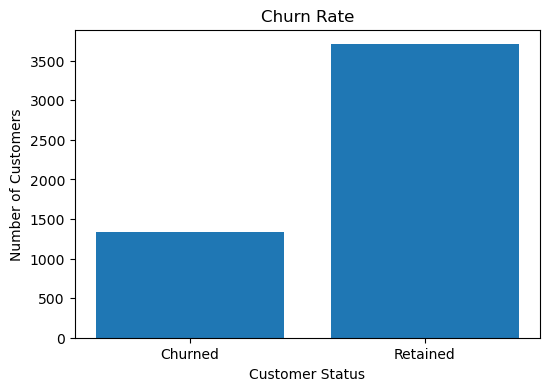

Overall Churn Rate: 26.49%


In [59]:
# Ans1

import pandas as pd
import matplotlib.pyplot as plt


churned_customers = df['Churn'].sum()
total_customers = len(df)

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

# Visualize the churn rate using a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Churned', 'Retained'], [churned_customers, total_customers - churned_customers])
plt.xlabel('Customer Status')
plt.ylabel('Number of Customers')
plt.title('Churn Rate')
plt.show()

print(f"Overall Churn Rate: {churn_rate:.2f}%")


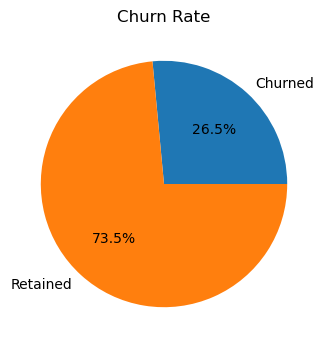

Overall Churn Rate: 26.49%


In [60]:
churned_customers = df['Churn'].sum()  # Assuming 'Churn' contains binary values (0 and 1)
total_customers = len(df)

# Calculate the churn rate
churn_rate = (churned_customers / total_customers) * 100

# Visualize the churn rate using a pie chart
plt.figure(figsize=(6, 4))
plt.pie([churned_customers, total_customers - churned_customers],
        labels=['Churned', 'Retained'], autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show()

print(f"Overall Churn Rate: {churn_rate:.2f}%")


The variations of churn Rate among the gender(Female and Male Customers)
we have to calculates Churn rate for Males and Females Separately and then visualize their rates of variation by bar chart.

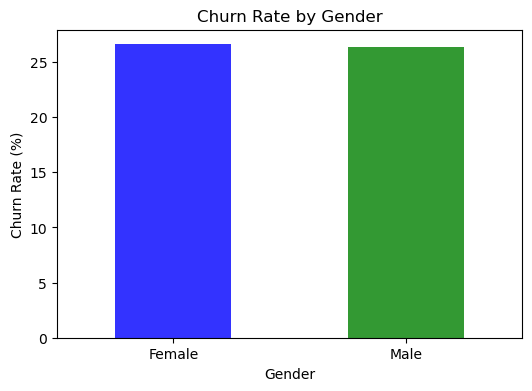

Churn Rate by Gender:
gender
Female    26.610306
Male      26.377491
Name: Churn, dtype: float64


In [61]:
#Ans2
# we calculate the mean of the 'Churn' column for each group, which gives us the churn rate for male and female customers separately. 
churn_by_gender = df.groupby('gender')['Churn'].mean() * 100

# Visualize the churn rate by gender using a bar chart
plt.figure(figsize=(6, 4))
churn_by_gender.plot(kind='bar', color=['blue', 'green'], alpha=0.8)
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.xticks(rotation=0)
plt.show()

print("Churn Rate by Gender:")
print(churn_by_gender)

To Look the influence of additional services such as" OnlineSecurity, TechSupport, DeviceProtection, StreamingTV, or StreamingMovies" on the customer Churn rate I compared the churn rates for customers with and without each additional service which help to understand whether the presence or absence of these services has an impact on customer churn behavior.and we loop through each additional service and calculate the churn rate for customers who have the service ('Has_Service') and those who do not have the service ('No_Service'). We store the results in the churn_rates_by_service dictionary.

In [62]:
#Ans3
# Calculate the churn rates for customers with and without each additional service
additional_services = ['OnlineSecurity', 'TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']
churn_rates_by_service = {}

for service in additional_services:
    has_service_churn_rate = df[df[service] == 'Yes']['Churn'].mean()
    no_service_churn_rate = df[df[service] == 'No']['Churn'].mean()
    
    churn_rates_by_service[service] = {
        'Has_Service': has_service_churn_rate,
        'No_Service': no_service_churn_rate
    }

# Print the churn rates for each additional service
print("Churn Rates by Additional Services:")
for service, rates in churn_rates_by_service.items():
    print(f"{service}:")
    print(f"Churn Rate with {service}: {rates['Has_Service']:.2f}%")
    print(f"Churn Rate without {service}: {rates['No_Service']:.2f}%")
    print()

Churn Rates by Additional Services:
OnlineSecurity:
Churn Rate with OnlineSecurity: 0.15%
Churn Rate without OnlineSecurity: 0.42%

TechSupport:
Churn Rate with TechSupport: 0.18%
Churn Rate without TechSupport: 0.41%

DeviceProtection:
Churn Rate with DeviceProtection: 0.24%
Churn Rate without DeviceProtection: 0.39%

StreamingTV:
Churn Rate with StreamingTV: 0.31%
Churn Rate without StreamingTV: 0.34%

StreamingMovies:
Churn Rate with StreamingMovies: 0.30%
Churn Rate without StreamingMovies: 0.34%



we used a grouped bar chart allows us to compare multiple categories side by side, making it suitable for comparing the churn rates of customers with and without each service.

<Figure size 1000x600 with 0 Axes>

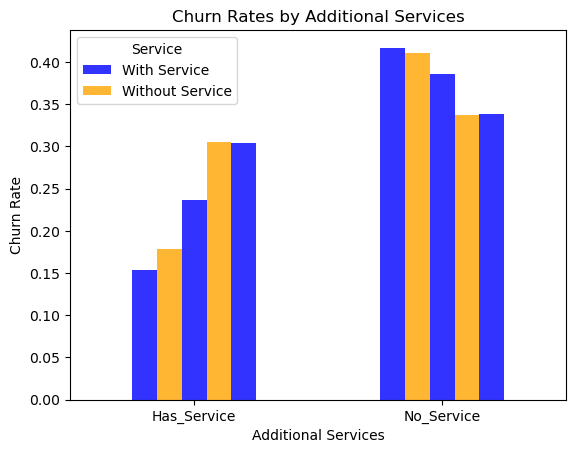

In [63]:
# Convert the churn rates to a pandas DataFrame
churn_df = pd.DataFrame(churn_rates_by_service)
# Visualize the churn rates using a grouped bar chart
plt.figure(figsize=(10, 6))
churn_df.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.xlabel('Additional Services')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Additional Services')
plt.xticks(rotation=0)
plt.legend(title='Service', labels=['With Service', 'Without Service'])
plt.show()

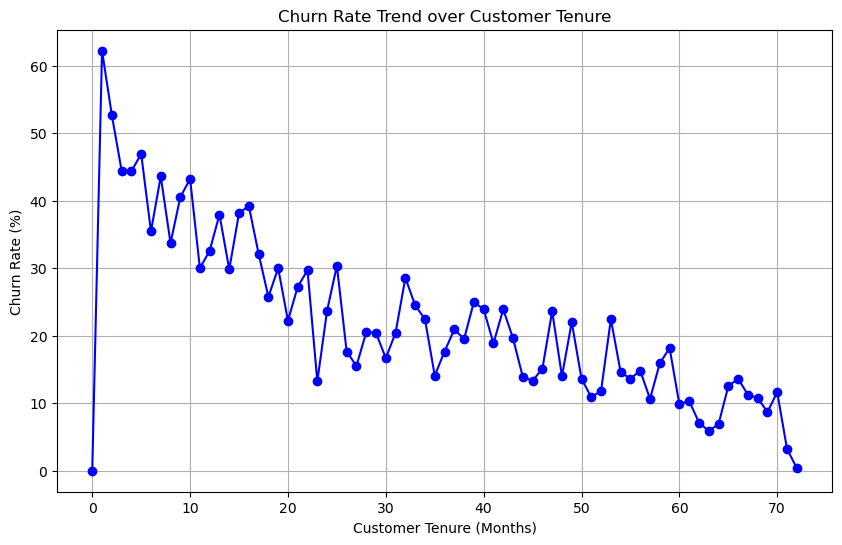

In [64]:
# Calculate the churn rate for each tenure duration
churn_rate_by_tenure = df.groupby('tenure')['Churn'].mean() * 100

# Visualize the churn rate trend over time using a line plot
plt.figure(figsize=(10, 6))
churn_rate_by_tenure.plot(kind='line', marker='o', color='b')
plt.xlabel('Customer Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate Trend over Customer Tenure')
plt.grid()
plt.show()

In [65]:
import scipy.stats as stats
# Create a contingency table
contingency_table = pd.crosstab(df['tenure'], df['Churn'])

# Perform the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square test statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi-square test statistic: 774.6387018848175
P-value: 2.503475573511817e-118
Degrees of freedom: 72
Expected frequencies table:
Churn            0           1
tenure                        
0         5.880627    2.119373
1       319.023994  114.976006
2       122.758081   44.241919
3       105.851279   38.148721
4        84.534008   30.465992
...            ...         ...
68       47.780091   17.219909
69       50.720405   18.279595
70       63.216736   22.783264
71       91.149712   32.850288
72      188.915130   68.084870

[73 rows x 2 columns]


To calculate the correlation between two Variables Such as Customer Tenure which is a continuous Variable and a dichotomous Variable such as Customers who(Churned and not churned) we calculated it by using the point-biserial correlation coefficient which is a statistical measure used to assess whether there is a significant correlation between the continuous and binary variables and to provide insights into the nature of relationship between  a continuous and binary variables.

In [66]:
# let calculate the point-biserial correlation coefficient and p-value
correlation_coefficient, p_value = stats.pointbiserialr(df['Churn'], df['tenure'])

# Print the correlation coefficient and p-value
print("Point-Biserial Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:  # Assuming a significance level of 0.05
    if correlation_coefficient > 0:
        print("There is a significant positive correlation between customer tenure and churn.")
    elif correlation_coefficient < 0:
        print("There is a significant negative correlation between customer tenure and churn.")
    else:
        print("There is no significant correlation between customer tenure and churn.")
else:
    print("The correlation is not statistically significant.")


Point-Biserial Correlation Coefficient: -0.35086072341340446
P-value: 5.0875912101805325e-146
There is a significant negative correlation between customer tenure and churn.


Therefore since we have a negative correlation of -0.35086072341340446 so, we concluded that the continuous variable increases, the likelihood of the binary variable being in the opposite category ( "not churned") increases as it is shown by the diagram below.

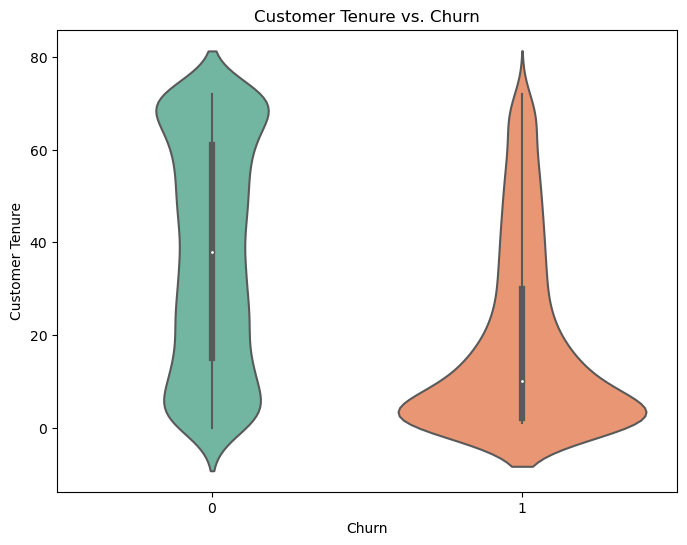

In [67]:

import seaborn as sns
# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Customer Tenure')
plt.title('Customer Tenure vs. Churn')
plt.show()

The plot shows a significant overlap between the two violins, it suggests that customer tenure may not be strongly associated with the likelihood of churn and suggests that there is a weaker correlation between these variables.

In [68]:
df["InternetService"].head()

0            DSL
1            DSL
2            DSL
3            DSL
4    Fiber optic
Name: InternetService, dtype: object

In [69]:
#exploring categorical columns.
df["InternetService"].describe(include='object') 

count            5043
unique              3
top       Fiber optic
freq             2248
Name: InternetService, dtype: object

In [70]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

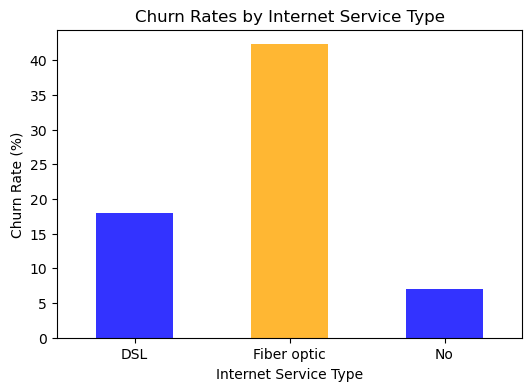

Churn Rates by Internet Service Type:
DSL: 18.02%
Fiber optic: 42.30%
No: 7.04%


In [71]:
#ans5
# Calculate the churn rates for each internet service type
churn_rate_by_service = df.groupby('InternetService')['Churn'].mean() * 100

# Visualize the churn rates for each internet service type using a bar chart
plt.figure(figsize=(6, 4))
churn_rate_by_service.plot(kind='bar', color=['blue', 'orange'], alpha=0.8)
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rates by Internet Service Type')
plt.xticks(rotation=0)
plt.show()

# Print the churn rates for each internet service type
print("Churn Rates by Internet Service Type:")
for Service, Churn_Rate in churn_rate_by_service.items():
    print(f"{Service}: {Churn_Rate:.2f}%")

The Internet Service may have Impact on customer Churn 

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,0
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,0
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,0
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,1


In [73]:
df['Churn'].isna().sum()

0

In [74]:
#import plotly.express as px
#df = px.data.iris()
#fig = px.scatter(df, x ='sepal_width', y ='sepal_length', color='species')
#fig.show()